This notebook presents a basic introduction of the concept of colors in photography. When filming a scene or recording a competition or a match, we might wonder how to set the camera's parameters in order to have the best possible rendering (best contrast, brightness, focus etc).

In order to answer this question, we will :

*   understand human perception of colors.
*   present Color variables and parameters that control its ton and shade.

*   introduce briefly the black magic camera set up in order to have the best rendering of a scene (good emphasis on white, reduction of noise due to the sensor sensitivity etc).





# Human perception of colors

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Let's load an image of reference that we will use through this notebook to try to understand how colors are encoded in RGB images.

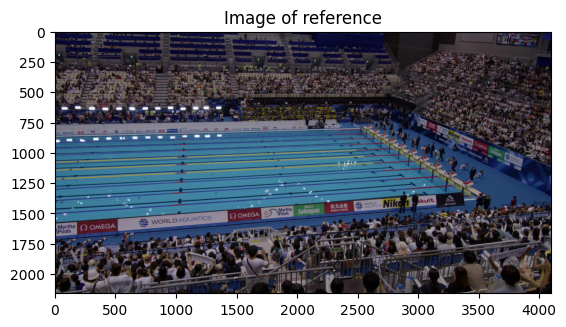

In [5]:
# display an RGB image and show its three channels
image=mpimg.imread("2023_CM_Fukuoka_brasse_dames_50_finaleA_fixeDroite.jpg")
plt.imshow(image)
plt.title("Image of reference")
plt.show()

This is an RGB image. The RGB colour model is an additive color model in which the red, green and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

Let's now perform the decomposition of this image into its three channels and display them independently.

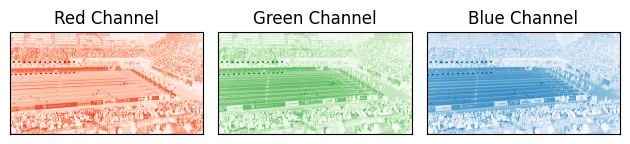

In [10]:
import cv2
import matplotlib.pyplot as plt

frame = cv2.imread("2023_CM_Fukuoka_brasse_dames_50_finaleA_fixeDroite.jpg")
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(frame_rgb)
figure, axes = plt.subplots(1, 3)
axes[0].imshow(r, cmap='Reds')
axes[1].imshow(g, cmap='Greens')
axes[2].imshow(b, cmap='Blues')

axes[0].set_title('Red Channel')
axes[1].set_title('Green Channel')
axes[2].set_title('Blue Channel')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

As we can see in the figures above, the frame of reference is a 3-dimensional matrix with the following shape : (height,width,number of channels). The number of channels here for an RGB image is 3. The pixel value for each channel range from 255 (maximum) to 0 (color absent).

# Color Variables
Each color has a wide range of tones and shades, which transform a basic color wheel into the complete palette of the 10 million colors humans can see. Each of the unique colors on this broad palette has a specific name, tone, and shade, which are determined by the color variables of hue, saturation, and luminance respectively. These variables are commonly referred to as HSL.

**Hue**

Hue refers to the radial position of a color on the RGB color wheel. It determines the name given to the color, like red, yellow, blue, or purple, and is displayed in degrees ranging from 0 to 360.

**Saturation**

Saturation refers to the purity or intensity of a color on a scale from 0 to 100. The lower the saturation level, the closer the color is to grayscale.

**Luminance**

Also known as brightness or value, luminance determines how bright or dark a color is. It ranges from 0 to 100, with 0 being black.

In [21]:
def saturate_frame(frame, saturation_factor):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_frame)
    new_s = np.clip(s * saturation_factor, 0, 255).astype(np.uint8)
    saturated_hsv_frame = cv2.merge([h, new_s, v])
    saturated_frame = cv2.cvtColor(saturated_hsv_frame, cv2.COLOR_HSV2RGB)

    return saturated_frame

The function above traanforms an RGB frame to its HSV representation (Hue, Saturation, Value). We than adjust the saturation value by multiplying by a saturation factor. We then reconvert the frame back to the RGB form. The same applies for the two functions below.

In [22]:
def modify_brightness(frame, brightness):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v_modified = np.clip(v + brightness, 0, 255).astype(np.uint8)
    hsv_modified = cv2.merge((h, s, v_modified))
    modified_frame = cv2.cvtColor(hsv_modified, cv2.COLOR_HSV2RGB)

    return modified_frame

In [24]:
def modify_hue(frame, hue_shift):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Modify hue value
    h_modified = np.clip(hsv[:,:,0] + hue_shift, 0, 179).astype(np.uint8)

    hsv[:,:,0] = h_modified
    modified_frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    return modified_frame

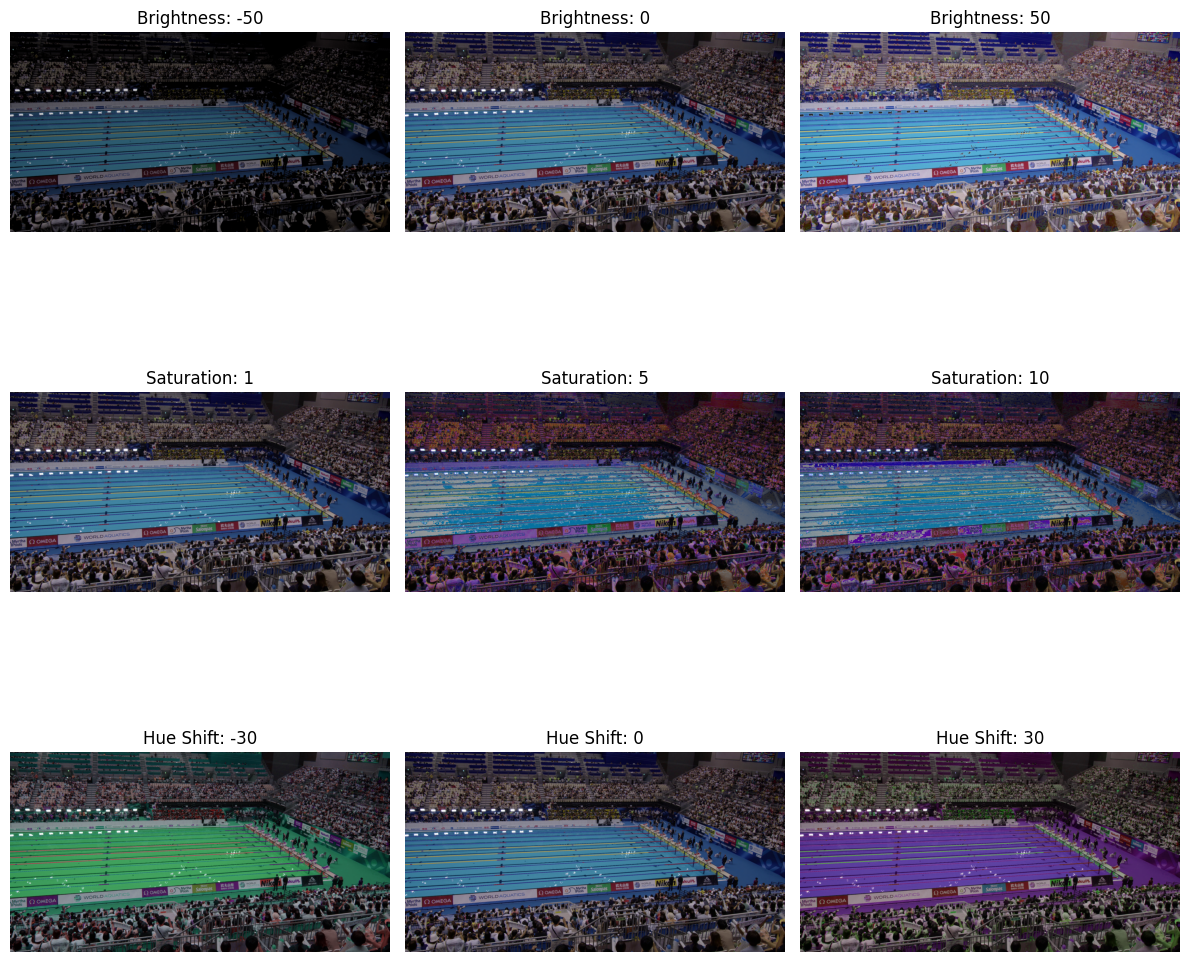

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original frame
frame = cv2.imread('2023_CM_Fukuoka_brasse_dames_50_finaleA_fixeDroite.jpg')

# Define brightness values for modification
brightness_values = [-50, 0, 50]
saturation_values=[1, 5, 10]
hue_shift_values=[-30,0,30]
# Create a figure to display the frames
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Modify the brightness and plot the resulting frames
for i, brightness in enumerate(brightness_values):
    modified_frame = modify_brightness(frame, brightness)
    axs[0,i].imshow(modified_frame)
    axs[0,i].set_title(f'Brightness: {brightness}')
for i, saturation in enumerate(saturation_values):
    saturated_frame = saturate_frame(frame, saturation)
    axs[1,i].imshow(saturated_frame)
    axs[1,i].set_title(f'Saturation: {saturation}')
for i, hue_shift in enumerate(hue_shift_values):
    modified_frame = modify_hue(frame, hue_shift)
    axs[2,i].imshow(modified_frame)
    axs[2,i].set_title(f'Hue Shift: {hue_shift}')

# Remove axis labels
for ax in axs:
  for axx in ax:
      axx.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Now that we presented human perception of colors and the parameters that influence this perception, let's now present the Pocket Black Magic Cinema Camera 6K used for recording competitions.

The reason we want to present this camera technology is the shift in brightness, hue, saturation between left video and right video recorded for competitions when stitched together.


# Black Magic Camera set up and parameters

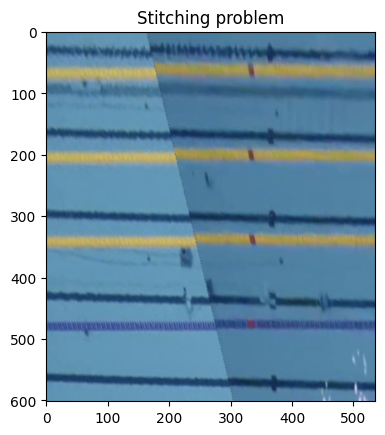

In [28]:
image=mpimg.imread("from_above.png")
plt.imshow(image)
plt.title("Stitching problem")
plt.show()

Let's now analyse the different parameters when recording a video with a Black Magic to try to understand the problem behind this shift.

 We need to bare in mind that , when recording competitions, left and right cameras may be exposed to different brightness scenes (light conditions) that may lead to an automatic update of the camera parameters and as a consequence a different color distribution between the two cameras.

## Color temperature
Setting the color temperature tells the camera how to interpret white and other colors in an image.

## Contrast
Adjusting contrast, or the tonal range of an image, can make different parts of the image stand out.

## ISO
Changing the ISO adjusts the camera’s sensitivity to light. Properly exposed shots require the right combination of ISO, aperture and shutter speed. Depending on the lights and exposure settings, you may need to adjust ISO in post.

## Tint
Adjusting tint is another way you can affect the overall color balance of an image. Unlike saturation or midpoint which can make reds redder or yellows more yellow, adjusting tint actually lets you push the colors in different directions.

## Saturation
Saturation is the strength or purity of a color. More saturated colors are pure and less saturated colors have a percentage of gray in proportion to their hue.

## Exposure
In order for your images to look good, you need to make sure that it’s not too bright (overexposed) or too dark (underexposed).